# Importing the packages we'll be using

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
matplotlib.style.use('ggplot')

In [4]:
# You can see what version of a given package you have installed like so:
pd.__version__

'0.22.0'

# Loading the Datasets 

### Original MovieLens

In [5]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genre']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [6]:
df = pd.merge(pd.merge(ratings, users), movies)

### Genre Separated version

In [7]:
df_genre_seperated = pd.read_csv('ml-1m/genre_seperated.dat', sep='\t', header=None, names=df.columns)

# Some variables and functions we'll be using

In [8]:
# More info on the dataset can be found here: http://files.grouplens.org/datasets/movielens/ml-1m-README.txt

occupation_dict = { 
    0: "not specified", 
    1: "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}

age_dict = {
    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}

In [9]:
# More information on Pandas Styling here: https://pandas.pydata.org/pandas-docs/stable/style.html
# Matplotlib color maps: https://matplotlib.org/users/colormaps.html

def highlight_max(s):
    '''
    highlight the maximum in a Series green.
    '''
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def highlight_min(s):
    '''
    highlight the minimum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

# The actual class-activity ↓

In [10]:
df.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genre
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [11]:
df_genre_seperated.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genre
0,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Animation
0,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Children's
0,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Comedy
0,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Animation
0,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Children's


### Find out how many times each genre was rated

In [12]:
df_genre_seperated.genre.value_counts()

Comedy         356590
Drama          354529
Action         257457
Thriller       189680
Sci-Fi         157294
Romance        147523
Adventure      133953
Crime           79541
Horror          76386
Children's      72196
War             68527
Animation       43303
Musical         41533
Mystery         40178
Fantasy         36301
Western         20683
Film-Noir       18261
Documentary      7910
Name: genre, dtype: int64

### How many ratings do we have for "Film-Noir" movies ?

In [13]:
df_genre_seperated.genre.value_counts().filter(items=['Film-Noir'])

Film-Noir    18261
Name: genre, dtype: int64

### Which users have the most/least ratings? What is the average rating for the top/bottom 5?

In [14]:
df.groupby("user_id")["rating"].agg(["mean", "count"]).sort_values(by=["count"], ascending=False).head()

,mean,count
user_id,,
4169,3.551858,2314
1680,3.555676,1850
4277,4.134825,1743
1941,3.054545,1595
1181,2.815911,1521


In [15]:
df.groupby("user_id")["rating"].agg(["mean", "count"]).sort_values(by=["count"], ascending=True).head()

,mean,count
user_id,,
947,3.00,20
4068,4.15,20
2530,3.85,20
341,4.20,20
5258,4.05,20


### Draw a histogram of the ratings

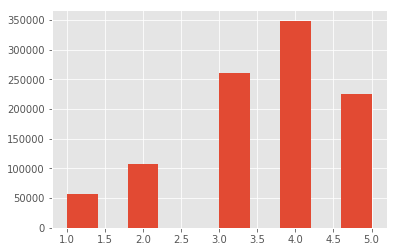

In [16]:
# Talk about semi-colon 
df['rating'].hist();

In [17]:
for style in plt.style.available:
    print(style)

seaborn-dark
seaborn-darkgrid
seaborn-ticks
fivethirtyeight
seaborn-whitegrid
classic
_classic_test
fast
seaborn-talk
seaborn-dark-palette
seaborn-bright
seaborn-pastel
grayscale
seaborn-notebook
ggplot
seaborn-colorblind
seaborn-muted
seaborn
Solarize_Light2
seaborn-paper
bmh
seaborn-white
dark_background
seaborn-poster
seaborn-deep


In [18]:
matplotlib.style.use('fivethirtyeight')

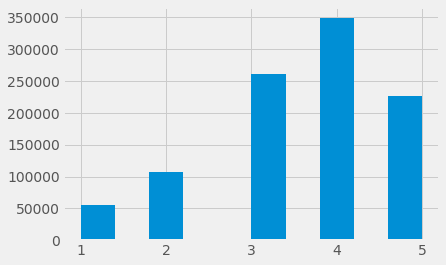

In [19]:
df['rating'].hist();

### Draw a boxplot of the ratings split by genre

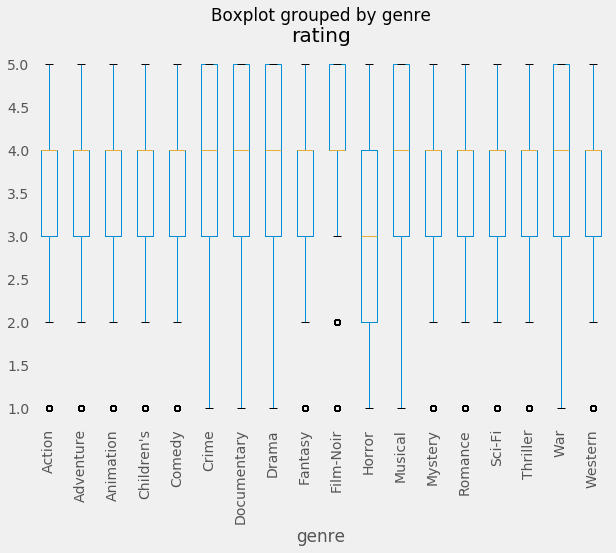

In [20]:
df_genre_seperated.boxplot(column=['rating'], by='genre', rot=90, figsize=(10,7), grid=False);

### Use the provided dictionaries to replace the age/occupation codes with the actual values they represent

In [21]:
df['age'] = [age_dict[x] for x in df['age']]
df['occupation'] = [occupation_dict[x] for x in df['occupation']]
df_genre_seperated['age'] = [age_dict[x] for x in df_genre_seperated['age']]
df_genre_seperated['occupation'] = [occupation_dict[x] for x in df_genre_seperated['occupation']]

In [22]:
df.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genre
0,1,1193,5,978300760,F,Under 18,K-12 student,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56+,self-employed,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25-34,programmer,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25-34,executive/managerial,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50-55,academic/educator,95350,One Flew Over the Cuckoo's Nest (1975),Drama


### Now draw a boxplot of the ratings by occupation. Warning: This dataset is boring.

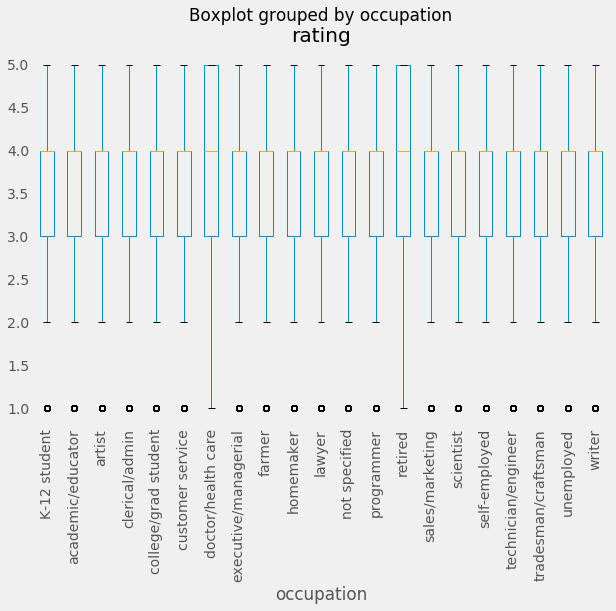

In [23]:
df_genre_seperated.boxplot(column=['rating'], by='occupation', rot=90, figsize=(10,7), grid=False);

###  Hmmm... How many people below the age of 18 are "retired" ?   ¯\\_(ツ)_/¯ 

In [24]:
df[(df['occupation'] == "retired") & (df['age'] == "Under 18")].shape

(23, 10)

In [25]:
df[(df['occupation'] == "retired") & (df['age'] == "Under 18")].head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genre
44665,4413,1961,4,965147657,M,Under 18,retired,37130,Rain Man (1988),Drama
78567,4413,2881,4,965148164,M,Under 18,retired,37130,Double Jeopardy (1999),Action|Thriller
145786,4413,2396,5,965148277,M,Under 18,retired,37130,Shakespeare in Love (1998),Comedy|Romance
280340,4413,2013,4,965148251,M,Under 18,retired,37130,"Poseidon Adventure, The (1972)",Action|Adventure
294927,4413,1513,4,965148276,M,Under 18,retired,37130,Romy and Michele's High School Reunion (1997),Comedy


###  What movie genres are most popular among programmers? How do they rate each genre?

In [26]:
df_genre_seperated[df_genre_seperated["occupation"] == "programmer"].groupby("genre")["rating"].agg(["mean","count"])

,mean,count
genre,,
Action,3.575455,17136
Adventure,3.564958,9052
Animation,3.706839,2705
Children's,3.432778,3905
Comedy,3.598995,19698
Crime,3.768506,4458
Documentary,3.844221,398
Drama,3.840207,18574
Fantasy,3.497192,2315


###  What movies are most popular among farmers? 

In [27]:
df_genre_seperated[df_genre_seperated["occupation"] == "farmer"].groupby("title")["rating"].agg(["mean","count"]).sort_values(by=["count"], ascending=False).head(10)

,mean,count
title,,
Star Wars: Episode VI - Return of the Jedi (1983),3.900000,50
Star Wars: Episode V - The Empire Strikes Back (1980),4.111111,45
Star Wars: Episode I - The Phantom Menace (1999),3.500000,40
E.T. the Extra-Terrestrial (1982),3.555556,36
"Princess Bride, The (1987)",4.000000,32
"Abyss, The (1989)",4.000000,32
Jurassic Park (1993),3.888889,27
Lethal Weapon (1987),4.000000,24
Batman (1989),3.666667,24


###  Create a table with the mean ratings for each genre for each occupation. Hint: pivot tables 

In [28]:
mean_ratings_of_genre_by_occupation = df_genre_seperated.pivot_table('rating', index='genre', columns='occupation', aggfunc='mean')

In [29]:
mean_ratings_of_genre_by_occupation

occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,not specified,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
genre,,,,,,,,,,,,,,,,,,,,,
Action,3.497116,3.392063,3.457569,3.549025,3.453687,3.494995,3.564004,3.568687,3.449309,3.601525,...,3.417847,3.575455,3.679048,3.528136,3.559685,3.510326,3.567827,3.475220,3.310577,3.339971
Adventure,3.425658,3.424278,3.443535,3.556486,3.419877,3.478934,3.553981,3.509195,3.397727,3.688992,...,3.425616,3.564958,3.650803,3.520496,3.567662,3.513258,3.560600,3.430316,3.287975,3.346110
Animation,3.463956,3.693399,3.624133,3.822104,3.655775,3.766940,3.681150,3.698059,3.529851,3.797980,...,3.674843,3.706839,3.545732,3.761057,3.847805,3.729696,3.734456,3.748663,3.395221,3.699623
Children's,3.220679,3.459286,3.377481,3.609614,3.346854,3.513463,3.485747,3.442969,3.229885,3.667447,...,3.438479,3.432778,3.485849,3.521694,3.592405,3.457459,3.481376,3.395288,2.973435,3.351509
Comedy,3.497200,3.519583,3.504449,3.601516,3.486595,3.474962,3.585793,3.517354,3.481363,3.579862,...,3.492581,3.598995,3.663825,3.553581,3.687170,3.507570,3.581307,3.445350,3.401392,3.423011
Crime,3.687085,3.659342,3.678039,3.742811,3.723450,3.696655,3.802857,3.736324,3.575758,3.642346,...,3.652772,3.768506,3.832487,3.734596,3.801012,3.737569,3.713289,3.635569,3.634085,3.651598
Documentary,3.581633,3.984887,4.028933,3.852632,3.962887,3.886598,4.013245,3.915134,3.900000,3.800000,...,3.854545,3.844221,3.970588,3.917763,3.987500,3.933492,4.024129,3.640000,3.727273,3.967914
Drama,3.782167,3.754293,3.732216,3.790601,3.748794,3.739991,3.871756,3.766663,3.627545,3.791185,...,3.743350,3.840207,3.949047,3.788018,3.836070,3.791983,3.800158,3.738553,3.619308,3.653348
Fantasy,3.298039,3.456388,3.424432,3.472675,3.363636,3.431478,3.486842,3.471070,3.407895,3.606357,...,3.426315,3.497192,3.678019,3.600000,3.545362,3.494278,3.528097,3.420833,3.230900,3.338421


###  Apply a style to this table that would help highlight the lowest rated genre for each occupation 

In [30]:
mean_ratings_of_genre_by_occupation.style.apply(highlight_min)

occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,lawyer,not specified,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
genre,,,,,,,,,,,,,,,,,,,,,
Action,3.49712,3.39206,3.45757,3.54903,3.45369,3.49499,3.564,3.56869,3.44931,3.60153,3.5168,3.41785,3.57546,3.67905,3.52814,3.55969,3.51033,3.56783,3.47522,3.31058,3.33997
Adventure,3.42566,3.42428,3.44353,3.55649,3.41988,3.47893,3.55398,3.5092,3.39773,3.68899,3.47249,3.42562,3.56496,3.6508,3.5205,3.56766,3.51326,3.5606,3.43032,3.28797,3.34611
Animation,3.46396,3.6934,3.62413,3.8221,3.65577,3.76694,3.68115,3.69806,3.52985,3.79798,3.72902,3.67484,3.70684,3.54573,3.76106,3.8478,3.7297,3.73446,3.74866,3.39522,3.69962
Children's,3.22068,3.45929,3.37748,3.60961,3.34685,3.51346,3.48575,3.44297,3.22989,3.66745,3.4562,3.43848,3.43278,3.48585,3.52169,3.59241,3.45746,3.48138,3.39529,2.97343,3.35151
Comedy,3.4972,3.51958,3.50445,3.60152,3.48659,3.47496,3.58579,3.51735,3.48136,3.57986,3.54975,3.49258,3.59899,3.66382,3.55358,3.68717,3.50757,3.58131,3.44535,3.40139,3.42301
Crime,3.68708,3.65934,3.67804,3.74281,3.72345,3.69666,3.80286,3.73632,3.57576,3.64235,3.73036,3.65277,3.76851,3.83249,3.7346,3.80101,3.73757,3.71329,3.63557,3.63409,3.6516
Documentary,3.58163,3.98489,4.02893,3.85263,3.96289,3.8866,4.01325,3.91513,3.9,3.8,4.14136,3.85455,3.84422,3.97059,3.91776,3.9875,3.93349,4.02413,3.64,3.72727,3.96791
Drama,3.78217,3.75429,3.73222,3.7906,3.74879,3.73999,3.87176,3.76666,3.62754,3.79118,3.76353,3.74335,3.84021,3.94905,3.78802,3.83607,3.79198,3.80016,3.73855,3.61931,3.65335
Fantasy,3.29804,3.45639,3.42443,3.47267,3.36364,3.43148,3.48684,3.47107,3.40789,3.60636,3.51475,3.42631,3.49719,3.67802,3.6,3.54536,3.49428,3.5281,3.42083,3.2309,3.33842


In [31]:
mean_ratings_of_genre_by_occupation.style.apply(highlight_max)

occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,lawyer,not specified,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
genre,,,,,,,,,,,,,,,,,,,,,
Action,3.49712,3.39206,3.45757,3.54903,3.45369,3.49499,3.564,3.56869,3.44931,3.60153,3.5168,3.41785,3.57546,3.67905,3.52814,3.55969,3.51033,3.56783,3.47522,3.31058,3.33997
Adventure,3.42566,3.42428,3.44353,3.55649,3.41988,3.47893,3.55398,3.5092,3.39773,3.68899,3.47249,3.42562,3.56496,3.6508,3.5205,3.56766,3.51326,3.5606,3.43032,3.28797,3.34611
Animation,3.46396,3.6934,3.62413,3.8221,3.65577,3.76694,3.68115,3.69806,3.52985,3.79798,3.72902,3.67484,3.70684,3.54573,3.76106,3.8478,3.7297,3.73446,3.74866,3.39522,3.69962
Children's,3.22068,3.45929,3.37748,3.60961,3.34685,3.51346,3.48575,3.44297,3.22989,3.66745,3.4562,3.43848,3.43278,3.48585,3.52169,3.59241,3.45746,3.48138,3.39529,2.97343,3.35151
Comedy,3.4972,3.51958,3.50445,3.60152,3.48659,3.47496,3.58579,3.51735,3.48136,3.57986,3.54975,3.49258,3.59899,3.66382,3.55358,3.68717,3.50757,3.58131,3.44535,3.40139,3.42301
Crime,3.68708,3.65934,3.67804,3.74281,3.72345,3.69666,3.80286,3.73632,3.57576,3.64235,3.73036,3.65277,3.76851,3.83249,3.7346,3.80101,3.73757,3.71329,3.63557,3.63409,3.6516
Documentary,3.58163,3.98489,4.02893,3.85263,3.96289,3.8866,4.01325,3.91513,3.9,3.8,4.14136,3.85455,3.84422,3.97059,3.91776,3.9875,3.93349,4.02413,3.64,3.72727,3.96791
Drama,3.78217,3.75429,3.73222,3.7906,3.74879,3.73999,3.87176,3.76666,3.62754,3.79118,3.76353,3.74335,3.84021,3.94905,3.78802,3.83607,3.79198,3.80016,3.73855,3.61931,3.65335
Fantasy,3.29804,3.45639,3.42443,3.47267,3.36364,3.43148,3.48684,3.47107,3.40789,3.60636,3.51475,3.42631,3.49719,3.67802,3.6,3.54536,3.49428,3.5281,3.42083,3.2309,3.33842


###  Apply a heatmap style to this table that would help highlight low/high ratings 

In [32]:
mean_ratings_of_genre_by_occupation.style.background_gradient(cmap="RdYlGn")

occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,lawyer,not specified,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
genre,,,,,,,,,,,,,,,,,,,,,
Action,3.49712,3.39206,3.45757,3.54903,3.45369,3.49499,3.564,3.56869,3.44931,3.60153,3.5168,3.41785,3.57546,3.67905,3.52814,3.55969,3.51033,3.56783,3.47522,3.31058,3.33997
Adventure,3.42566,3.42428,3.44353,3.55649,3.41988,3.47893,3.55398,3.5092,3.39773,3.68899,3.47249,3.42562,3.56496,3.6508,3.5205,3.56766,3.51326,3.5606,3.43032,3.28797,3.34611
Animation,3.46396,3.6934,3.62413,3.8221,3.65577,3.76694,3.68115,3.69806,3.52985,3.79798,3.72902,3.67484,3.70684,3.54573,3.76106,3.8478,3.7297,3.73446,3.74866,3.39522,3.69962
Children's,3.22068,3.45929,3.37748,3.60961,3.34685,3.51346,3.48575,3.44297,3.22989,3.66745,3.4562,3.43848,3.43278,3.48585,3.52169,3.59241,3.45746,3.48138,3.39529,2.97343,3.35151
Comedy,3.4972,3.51958,3.50445,3.60152,3.48659,3.47496,3.58579,3.51735,3.48136,3.57986,3.54975,3.49258,3.59899,3.66382,3.55358,3.68717,3.50757,3.58131,3.44535,3.40139,3.42301
Crime,3.68708,3.65934,3.67804,3.74281,3.72345,3.69666,3.80286,3.73632,3.57576,3.64235,3.73036,3.65277,3.76851,3.83249,3.7346,3.80101,3.73757,3.71329,3.63557,3.63409,3.6516
Documentary,3.58163,3.98489,4.02893,3.85263,3.96289,3.8866,4.01325,3.91513,3.9,3.8,4.14136,3.85455,3.84422,3.97059,3.91776,3.9875,3.93349,4.02413,3.64,3.72727,3.96791
Drama,3.78217,3.75429,3.73222,3.7906,3.74879,3.73999,3.87176,3.76666,3.62754,3.79118,3.76353,3.74335,3.84021,3.94905,3.78802,3.83607,3.79198,3.80016,3.73855,3.61931,3.65335
Fantasy,3.29804,3.45639,3.42443,3.47267,3.36364,3.43148,3.48684,3.47107,3.40789,3.60636,3.51475,3.42631,3.49719,3.67802,3.6,3.54536,3.49428,3.5281,3.42083,3.2309,3.33842


### Which movies do men and women most disagree on? 
#### Source: http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/

In [33]:
df_pivoted = df.pivot_table(index=['movie_id', 'title'],
                            columns=['gender'],
                            values='rating')
df_pivoted.head()

,gender,F,M
movie_id,title,,
1,Toy Story (1995),4.187817,4.130552
2,Jumanji (1995),3.278409,3.175238
3,Grumpier Old Men (1995),3.073529,2.994152
4,Waiting to Exhale (1995),2.976471,2.482353
5,Father of the Bride Part II (1995),3.212963,2.888298


In [34]:
df_pivoted['diff'] = df_pivoted.M - df_pivoted.F
df_pivoted.head()

,gender,F,M,diff
movie_id,title,,,
1,Toy Story (1995),4.187817,4.130552,-0.057265
2,Jumanji (1995),3.278409,3.175238,-0.103171
3,Grumpier Old Men (1995),3.073529,2.994152,-0.079377
4,Waiting to Exhale (1995),2.976471,2.482353,-0.494118
5,Father of the Bride Part II (1995),3.212963,2.888298,-0.324665


In [35]:
df_pivoted.reset_index('movie_id', inplace=True)

In [36]:
most_popular = df.groupby('movie_id').size().sort_values(ascending=False)[:50]

In [37]:
disagreements = df_pivoted[df_pivoted.movie_id.isin(most_popular.index)]['diff']
disagreements = disagreements.sort_values()

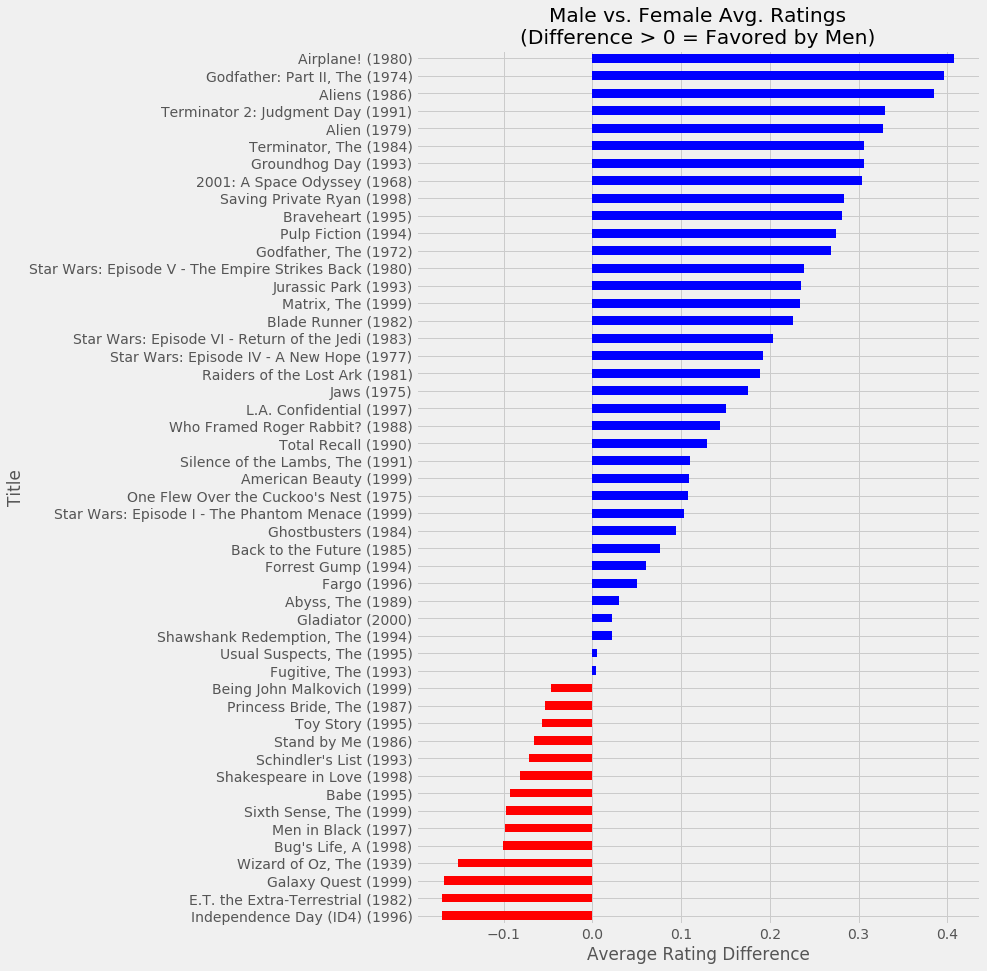

In [38]:
mask = disagreements < 0

colors = np.array(['b']*len(disagreements))
colors[mask.values] = 'r'

disagreements.sort_values().plot(kind='barh', figsize=[9, 15], color = colors)

plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');